# Pretest

Marc Pérez  
May 22, 2025

## Context

To explore, whether the proposed mechanisms and experiments to assess their dynamic, in a first step the Treatment levels $0P$ and $166P$ for all sites were analyzed. The experiments were conducted as displayed in the original paper of Flossmann & Richter with adjustments according to developments in technique and available equipment of the soil laboratory. Instead of the CAL-method, the Olsen-method was used to measure and estimate the quantity of P.

## Model of P-release after Flossman & Richter

$$\frac{dP}{dt}=k\times(P^S-P)$$ The constant $P^S$ denotes the amount of semi-labile P and was originally estimated as $P_\text{Olsen}-P_{H_2O}$. Subsequently the DE is solved exactly, since the soil is as $t=0$ mixed with deionized water, it was assumed that $P(0)=0$

## Exact Solution

$$P(t)=P^{\text{S}}-C\times e^{-kt}$$

for $P(0)=P_0$ we receive:

$$P(t)=P^S-(P^S-P_0)\times e^{-kt}$$

If we set $P(0)=0$ we receive:

$$P(t)=P^S\times(1-e^{-kt})$$

## Linearization

Now we linearize the DE, so that a linear model can be employed to test the relation and estimate the parameters of interest:

$$P(t)=P^S-(P^S-P_0)\times e^{-kt}$$

$$P(t)-P^S=-(P^S-P_0)\times e^{-kt}$$

$$P^S-P(t)=(P^S-P_0)\times e^{-kt}$$

$$1-\frac{P(t)}{P^S}=(1-\frac{P_0}{P^S})\times e^{-kt}$$

Given $P_0=0$,

$$log(1-\frac{P(t)}{P^S})=-kt$$

## Setup and preparation of dataset

In [ ]:

RES <- list()

library(multcomp)


Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: 'TH.data'

The following object is masked from 'package:MASS':

    geyser

Loading required package: carData

Loading required package: Matrix


Attaching package: 'Matrix'

The following objects are masked from 'package:tidyr':

    expand, pack, unpack

Loading required package: ggpp

Registered S3 methods overwritten by 'ggpp':
  method                  from   
  heightDetails.titleGrob ggplot2
  widthDetails.titleGrob  ggplot2


Attaching package: 'ggpp'

The following object is masked from 'package:ggplot2':

    annotate


Attaching package: 'nlme'

The following object is masked from 'package:lme4':

    lmList


Attaching package: 'dplyr'

The following object is masked from 'package:kableExtra':

    group_rows

The following object is masked from 'package:nlme':

    collapse

The following object is masked from 'package:car':

    recode

The following object is masked from 'package:MASS':

    select

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

'data.frame':   394 obs. of  20 variables:
 $ Site              : chr  "Cadenazzo" "Cadenazzo" "Cadenazzo" "Cadenazzo" ...
 $ Treatment         : Factor w/ 3 levels "P0","P100","P166": 1 1 1 1 1 1 1 1 1 1 ...
 $ Repetition        : Factor w/ 4 levels "1","2","3","4": 2 2 2 2 2 2 1 1 1 1 ...
 $ Nummer            : num  1 1 1 1 1 1 2 2 2 2 ...
 $ mSoil_Olsen.g.    : chr  "10.05" "10.05" "10.05" "10.05" ...
 $ mSoil_H2O.g.      : num  10.3 10.3 10.3 10.3 10.3 ...
 $ Abs_labile.1.     : chr  "0.26" "0.26" "0.26" "0.26" ...
 $ Abs_Olsen.1.      : chr  "1.02" "1.02" "1.02" "1.02" ...
 $ Abs_Olsen1_10.1.  : chr  "0.28" "0.28" "0.28" "0.28" ...
 $ t.min.            : num  5 10 20 30 45 60 5 10 20 30 ...
 $ Abs.1.            : num  0.21 0.22 0.23 0.24 0.26 0.25 0.22 0.24 0.25 0.27 ...
 $ Pv_labile.mg.L.   : num  0.05 0.05 0.05 0.05 0.05 0.05 0.06 0.06 0.06 0.06 ...
 $ Pv_Olsen.mg.L.    : num  0.35 0.35 0.35 0.35 0.35 0.35 0.42 0.42 0.42 0.42 ...
 $ Pv_Olsen1_10.mg.L.: chr  "0.46" "0.46" "0.46" 

Now we can see, whether our linearized model displays a linear relation.

Call:
  Model: Y1 ~ t.min. | uid 
   Data: d 

Coefficients:
   (Intercept) 
                      Estimate Std. Error    t value     Pr(>|t|)
Cadenazzo_P0_1     -0.12891945 0.01537006  -8.387702 4.332766e-12
Cadenazzo_P0_2     -0.12037045 0.01537006  -7.831491 4.433395e-11
Cadenazzo_P0_3              NA         NA         NA           NA
Cadenazzo_P0_4              NA         NA         NA           NA
Cadenazzo_P100_1            NA         NA         NA           NA
Cadenazzo_P100_2            NA         NA         NA           NA
Cadenazzo_P100_3            NA         NA         NA           NA
Cadenazzo_P100_4            NA         NA         NA           NA
Cadenazzo_P166_1   -0.26932199 0.01537006 -17.522512 6.499702e-27
Cadenazzo_P166_2   -0.19243796 0.01537006 -12.520316 2.550625e-19
Cadenazzo_P166_3            NA         NA         NA           NA
Cadenazzo_P166_4            NA         NA         NA           NA
Ellighausen_P0_1   -0.10464296 0.01537006  -6.808236 3.136905e-09

`geom_smooth()` using formula = 'y ~ x'

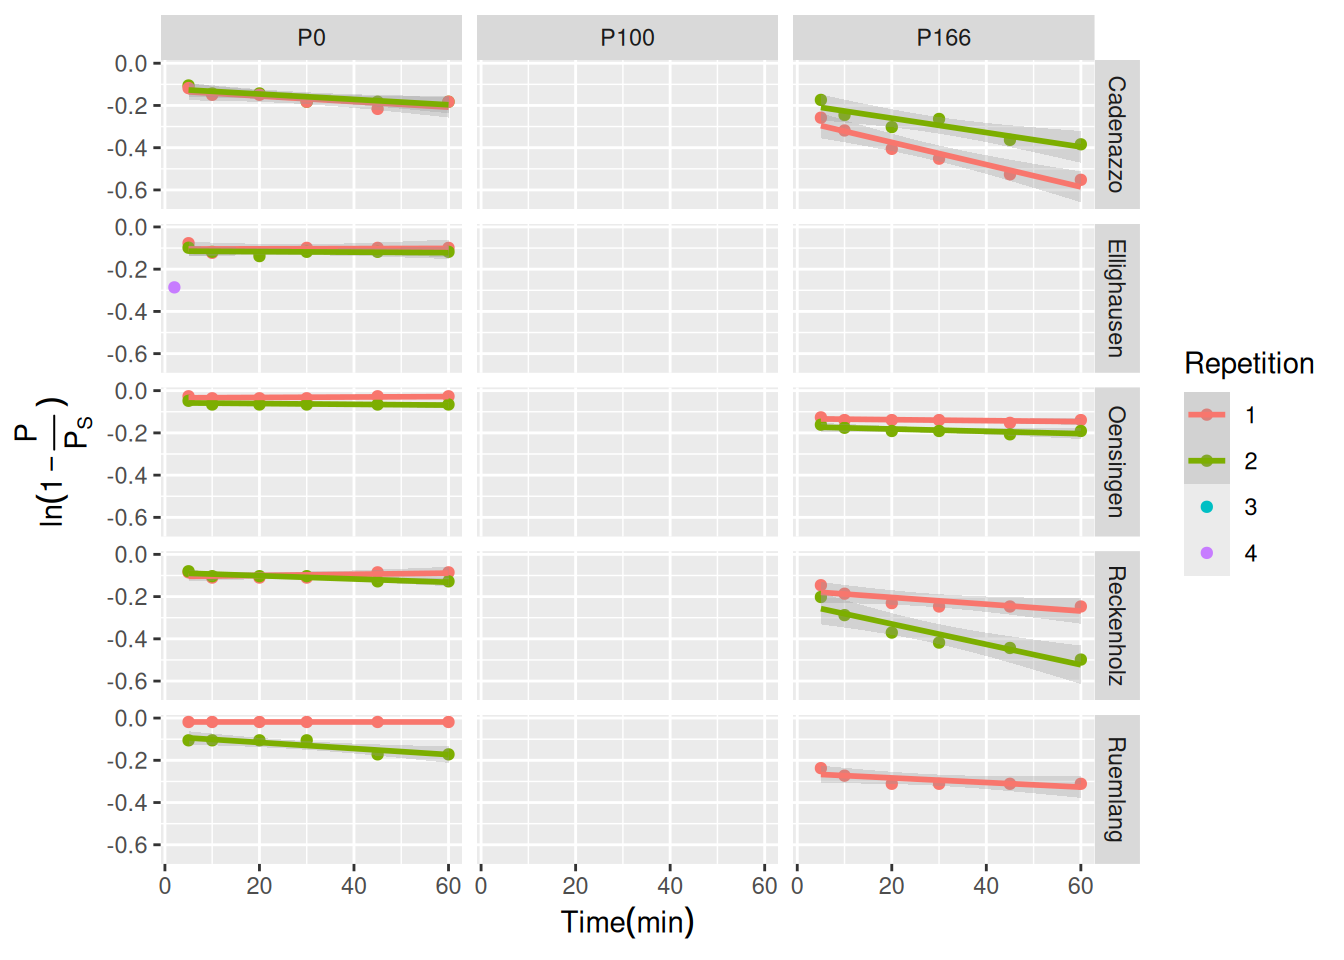

In [ ]:
res <- lmList(Y1 ~ t.min. | uid, d,na.action = na.pass)
summary(res)


If the parameter for the plateau could be estimated directly by using a non-linear non-least-squares model, we could omit the Olsen-measurement in the future.

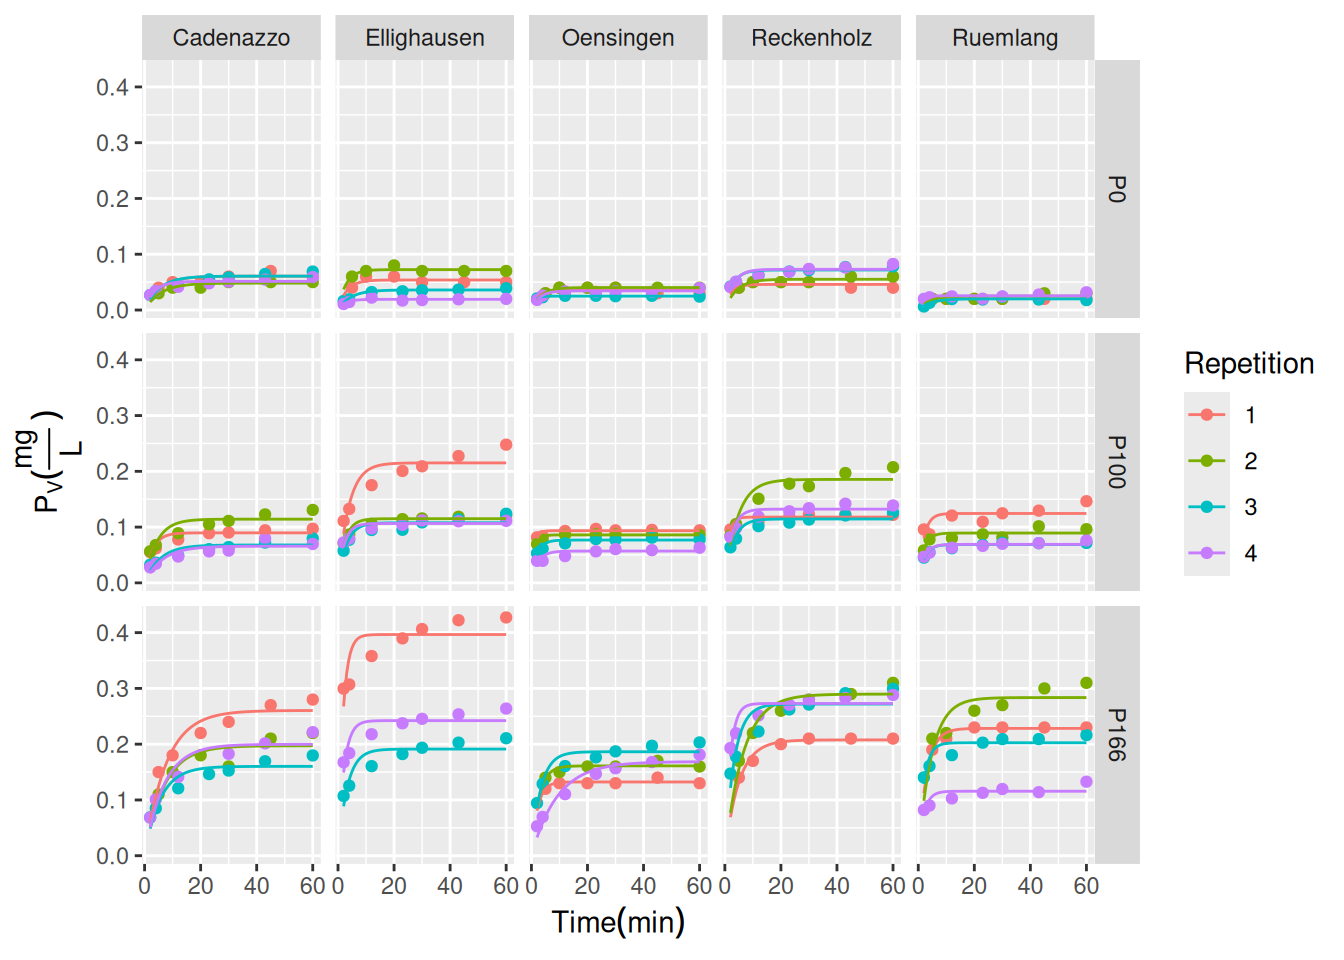

In [ ]:

Res <- nlsList(Pv.mg.L. ~ PS * (1 - exp(-k * t.min.)) | uid, d[, c("Pv.mg.L.", "uid", "t.min.")],  start=list(PS=0.1,k=0.2))
# summary(Res)
# d$nls_pred <- predict(Res)

# Extract coefficients from the nlsList results
nls_coefs <- coef(Res)
nls_coefs$uid <- rownames(nls_coefs)

# Merge coefficients back to the main dataset
d_plot <- merge(d, nls_coefs, by = "uid")

# Most straightforward approach - create curves manually
time_seq <- seq(min(d$t.min., na.rm = TRUE), max(d$t.min., na.rm = TRUE), length.out = 100)

# Create prediction data
pred_data <- d_plot %>%
  select(uid, Site, Treatment, Repetition, PS, k) %>%
  distinct() %>%
  crossing(t.min. = time_seq) %>%
  mutate(pred_Pv = PS * (1 - exp(-k * t.min.)))

# Final plot
p1 <- ggplot() +
  geom_point(data = d_plot, aes(y = Pv.mg.L., x = t.min., col = Repetition)) +
  geom_line(data = pred_data, aes(x = t.min., y = pred_Pv, col = Repetition), size = 0.5) +
  facet_grid(Treatment ~ Site) +
  labs(x = TeX("$Time (min)$"),
       y = TeX("$P_{V}(\\frac{mg}{L})$")); suppressWarnings(print(p1))


LG: hier machen wir folgendes:

1.  Visualisiere Daten
2.  for k\*PS use sqrt-scale
3.  Erkenne, dass keine offenslichtichen verletzuungen für ein lineares modell vorhanden sind
4.  fitte ordinary linear squares model, with Treatment as the factor of interest and Site as covariate (analougous to paired t-test and equivalent to anova with Site as block factor)
5.  Perform a classical Type II anova (using the car::Anova function)
6.  Perform (post-hoc) TukeyHSD test (using multcomp package)

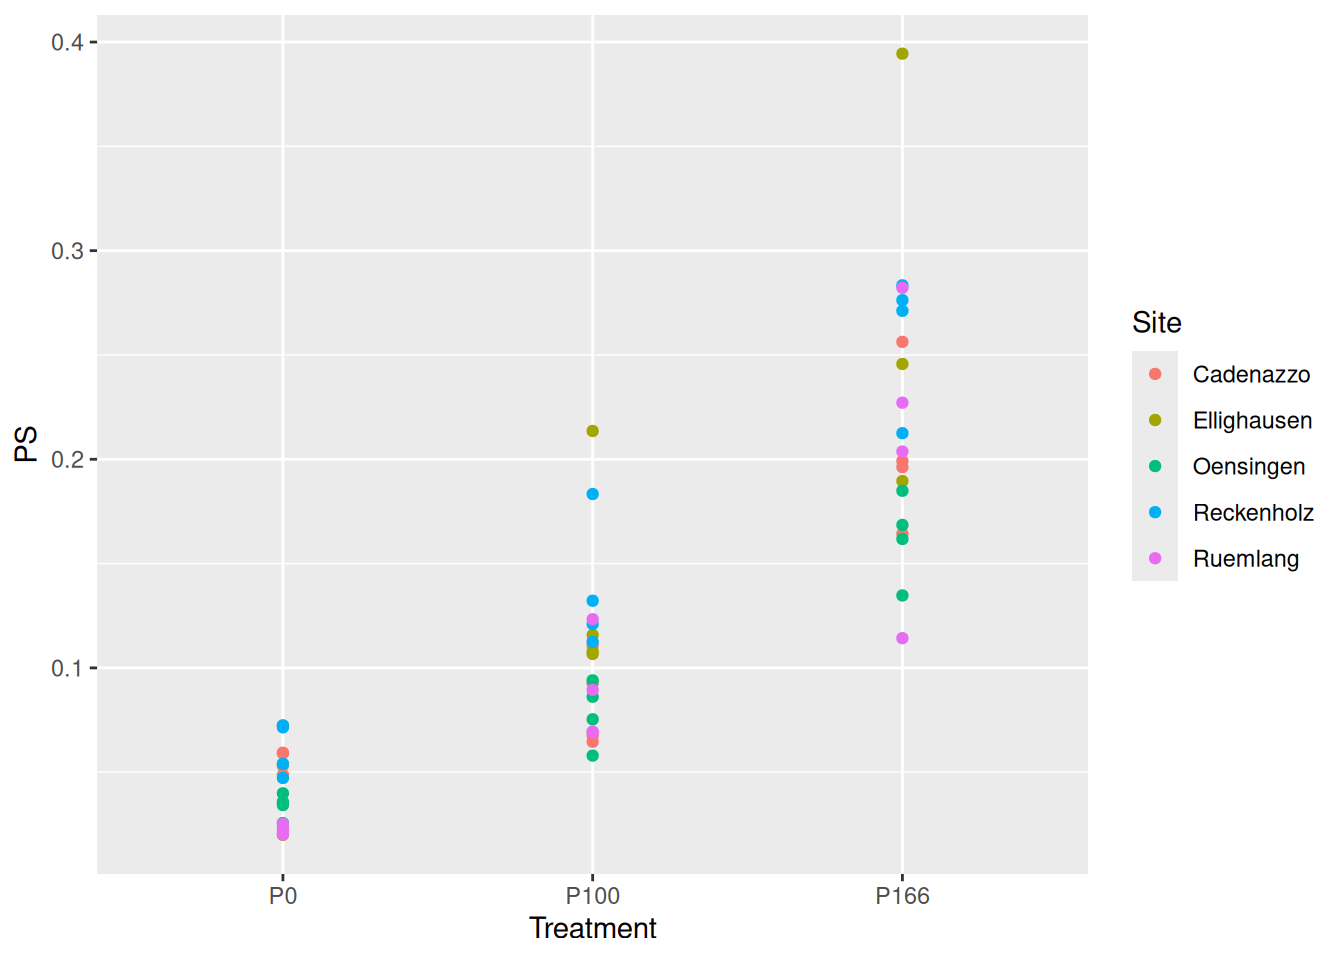

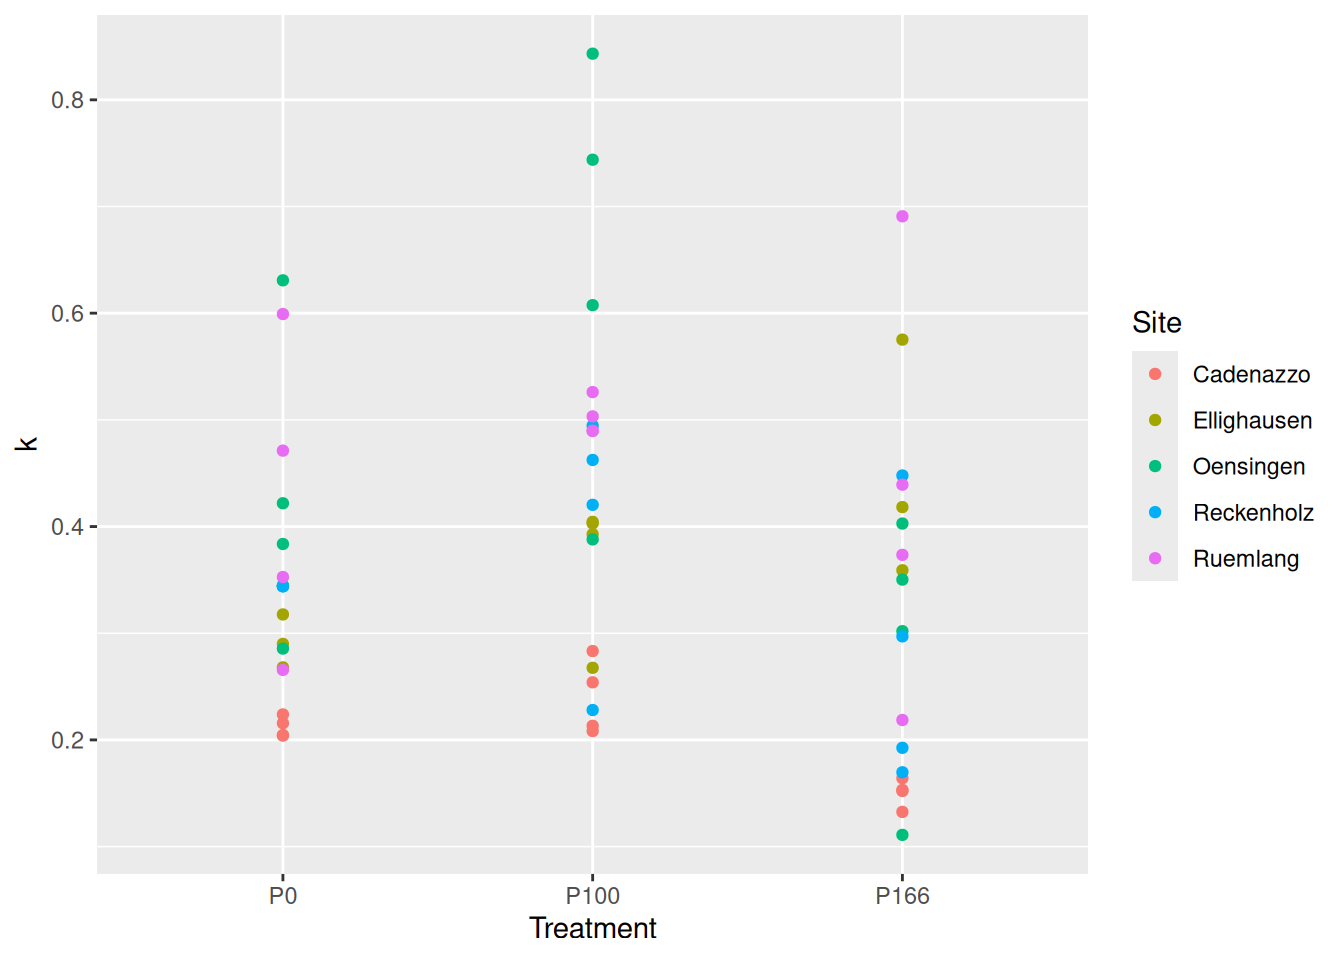

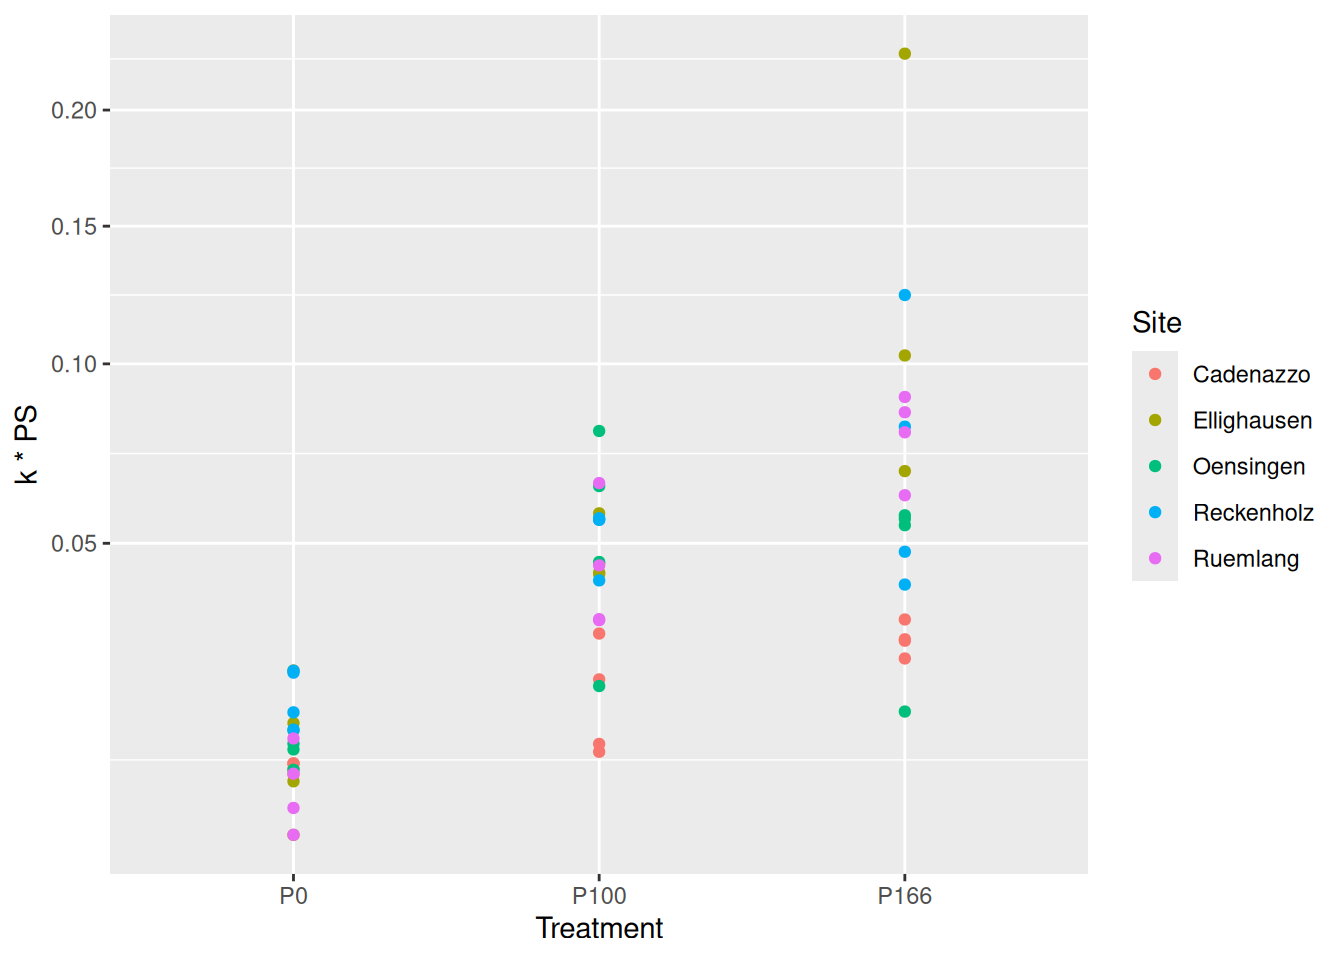

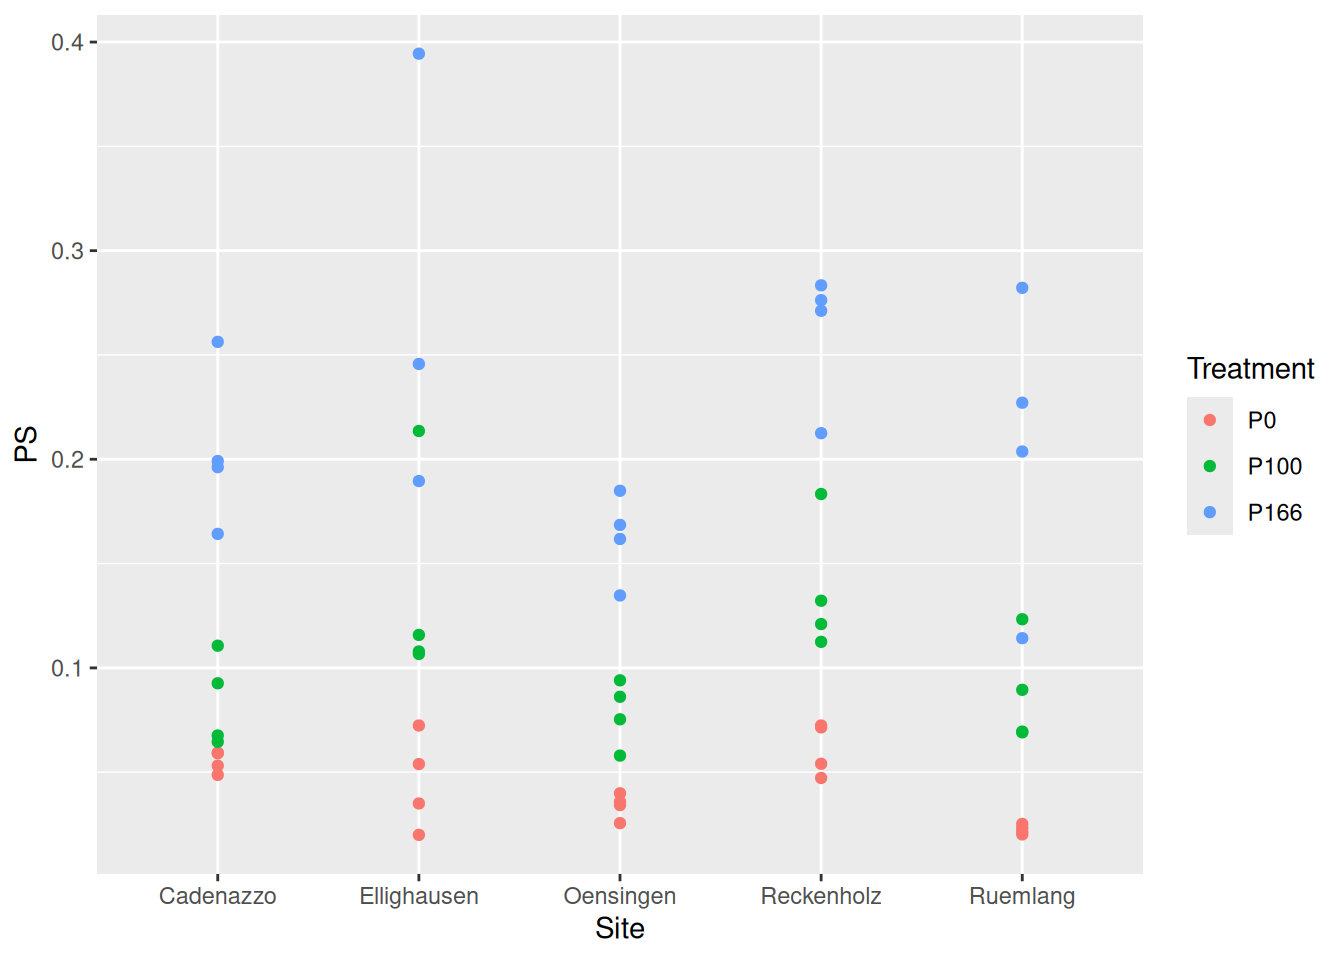

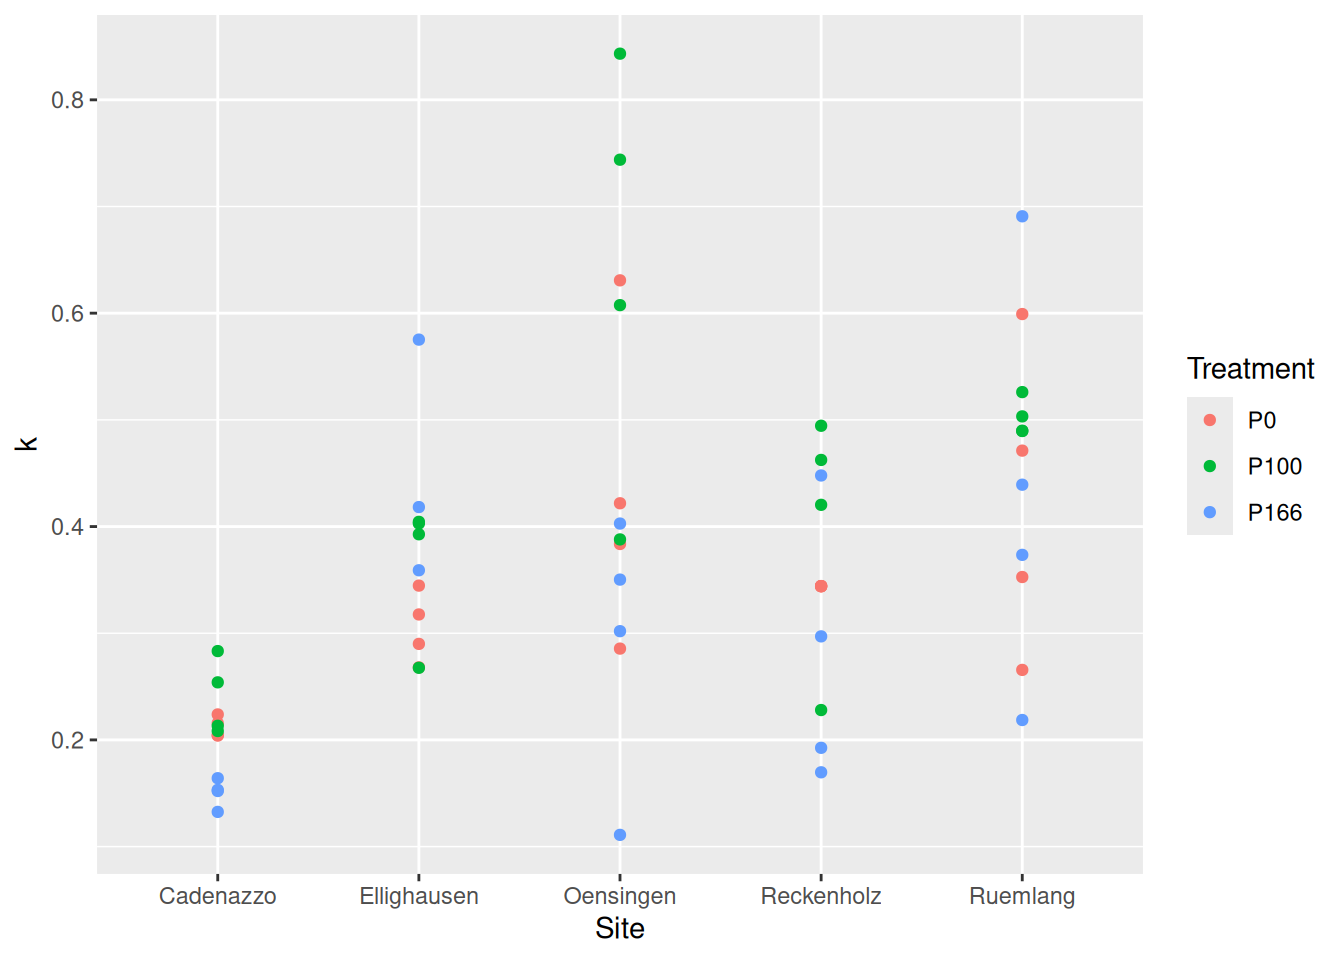

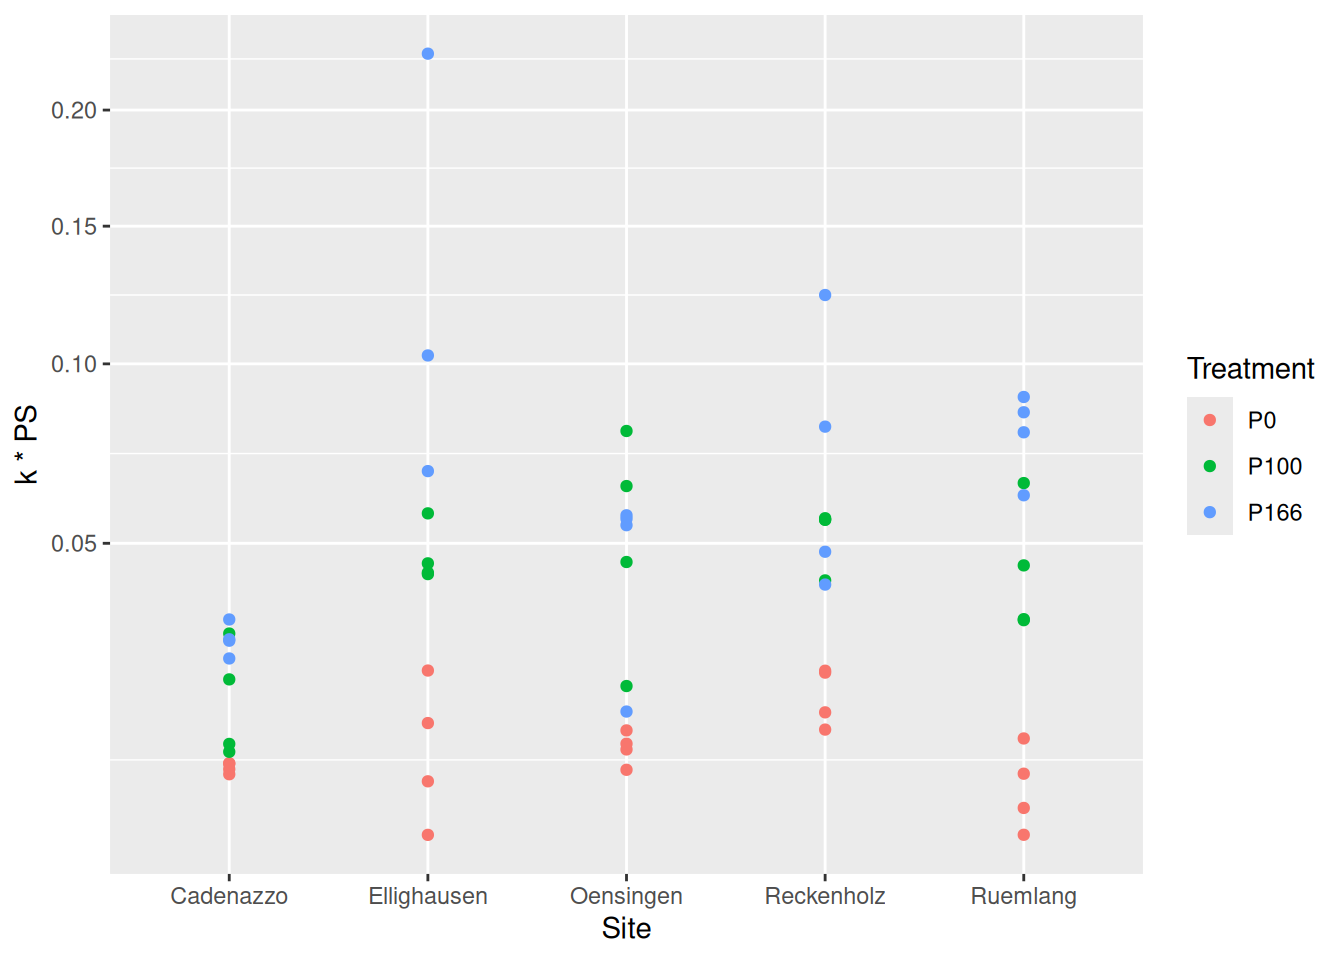

Anova Table (Type II tests)

Response: PS
            Sum Sq Df  F value    Pr(>F)    
Treatment 0.313297  2 105.7251 < 2.2e-16 ***
Site      0.035346  4   5.9639 0.0005002 ***
Residuals 0.077046 52                       
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


     Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lm(formula = PS ~ Treatment + Site, data = nlme.coef)

Linear Hypotheses:
                 Estimate Std. Error t value Pr(>|t|)    
P100 - P0 == 0    0.06105    0.01217   5.016   <1e-04 ***
P166 - P0 == 0    0.17710    0.01234  14.348   <1e-04 ***
P166 - P100 == 0  0.11604    0.01234   9.401   <1e-04 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

Anova Table (Type II tests)

Response: k
           Sum Sq Df F value    Pr(>F)    
Treatment 0.14807  2  5.1204  0.009336 ** 
Site      0.51961  4  8.9843 1.358e-05 ***
Residuals 0.75187 52                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


     Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lm(formula = k ~ Treatment + Site, data = nlme.coef)

Linear Hypotheses:
                 Estimate Std. Error t value Pr(>|t|)   
P100 - P0 == 0    0.08838    0.03802   2.324  0.06121 . 
P166 - P0 == 0   -0.02961    0.03856  -0.768  0.72424   
P166 - P100 == 0 -0.11798    0.03856  -3.060  0.00957 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

Anova Table (Type II tests)

Response: I(sqrt(k * PS))
            Sum Sq Df F value   Pr(>F)    
Treatment 0.186813  2 42.4144 1.19e-11 ***
Site      0.047097  4  5.3465 0.001105 ** 
Residuals 0.114516 52                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


     Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lm(formula = I(sqrt(k * PS)) ~ Treatment + Site, data = nlme.coef)

Linear Hypotheses:
                 Estimate Std. Error t value Pr(>|t|)    
P100 - P0 == 0    0.08750    0.01484   5.896  < 1e-04 ***
P166 - P0 == 0    0.13638    0.01505   9.063  < 1e-04 ***
P166 - P100 == 0  0.04888    0.01505   3.248  0.00572 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

In [ ]:
ggplot(nlme.coef, aes(y=PS  , x=Treatment, col=Site)) + geom_point() #+ geom_line(aes(group=Site))


Results:

1.  for PS Treatment explains a lot, and site not so much. c.f. plot for a monotonous relationship
2.  for k, the Treatment seems to be little relevant

In [ ]:
# new Data set, that gives info about Soil
allP <- readRDS("~/Documents/Master Thesis/Master-Thesis-P-kinetics/data/all_P.rds")
allP$rep <- allP$rep %>% as.roman() %>% as.integer()
allP$uid <- paste(allP$location,allP$treatment_ID,as.character(allP$rep),sep = "_")

# 1. merge this with nlme.coef
nlme.coef <- merge(nlme.coef,allP[allP$year==2018,],by = "uid")

fit.PS   <- lm(PS            ~ soil_0_20_clay+ soil_0_20_pH_H2O + soil_0_20_Corg + soil_0_20_silt + fert_P_tot, nlme.coef)
fit.k    <- lm(k             ~ soil_0_20_clay+ soil_0_20_pH_H2O + soil_0_20_Corg + soil_0_20_silt + fert_P_tot, nlme.coef)
fit.kPS  <- lm(I(sqrt(k*PS)) ~ soil_0_20_clay+ soil_0_20_pH_H2O + soil_0_20_Corg + soil_0_20_silt + fert_P_tot, nlme.coef)


fit.Yrel     <- lm(Ymain_rel         ~ k + PS + I(sqrt(k*PS)), nlme.coef)
fit.Puptake  <- lm(annual_P_uptake   ~ k + PS + I(sqrt(k*PS)), nlme.coef)
Anova(fit.PS)


Anova Table (Type II tests)

Response: PS
                  Sum Sq Df F value    Pr(>F)    
soil_0_20_clay   0.00644  1  1.2395   0.26966    
soil_0_20_pH_H2O 0.00077  1  0.1476   0.70207    
soil_0_20_Corg   0.00565  1  1.0880   0.30077    
soil_0_20_silt   0.02651  1  5.1044   0.02723 *  
fert_P_tot       0.17551  1 33.7904 2.025e-07 ***
Residuals        0.33762 65                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Anova Table (Type II tests)

Response: k
                  Sum Sq Df F value   Pr(>F)   
soil_0_20_clay   0.09689  1  6.4345 0.013603 * 
soil_0_20_pH_H2O 0.08392  1  5.5730 0.021250 * 
soil_0_20_Corg   0.04900  1  3.2539 0.075890 . 
soil_0_20_silt   0.11540  1  7.6638 0.007333 **
fert_P_tot       0.00457  1  0.3037 0.583448   
Residuals        0.97879 65                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Anova Table (Type II tests)

Response: I(sqrt(k * PS))
                   Sum Sq Df F value   Pr(>F)    
soil_0_20_clay   0.001592  1  0.3815  0.53896    
soil_0_20_pH_H2O 0.003686  1  0.8829  0.35087    
soil_0_20_Corg   0.018543  1  4.4423  0.03892 *  
soil_0_20_silt   0.001267  1  0.3035  0.58359    
fert_P_tot       0.124767  1 29.8901 7.79e-07 ***
Residuals        0.271323 65                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Anova Table (Type II tests)

Response: Ymain_rel
                Sum Sq Df F value    Pr(>F)    
k               1132.5  1 14.0805 0.0005199 ***
PS               347.9  1  4.3253 0.0435470 *  
I(sqrt(k * PS))  826.2  1 10.2726 0.0025463 ** 
Residuals       3458.5 43                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Anova Table (Type II tests)

Response: annual_P_uptake
                 Sum Sq Df F value Pr(>F)
k                 71.07  1  1.8918 0.1736
PS                32.23  1  0.8581 0.3576
I(sqrt(k * PS))   87.82  1  2.3377 0.1310
Residuals       2516.93 67               

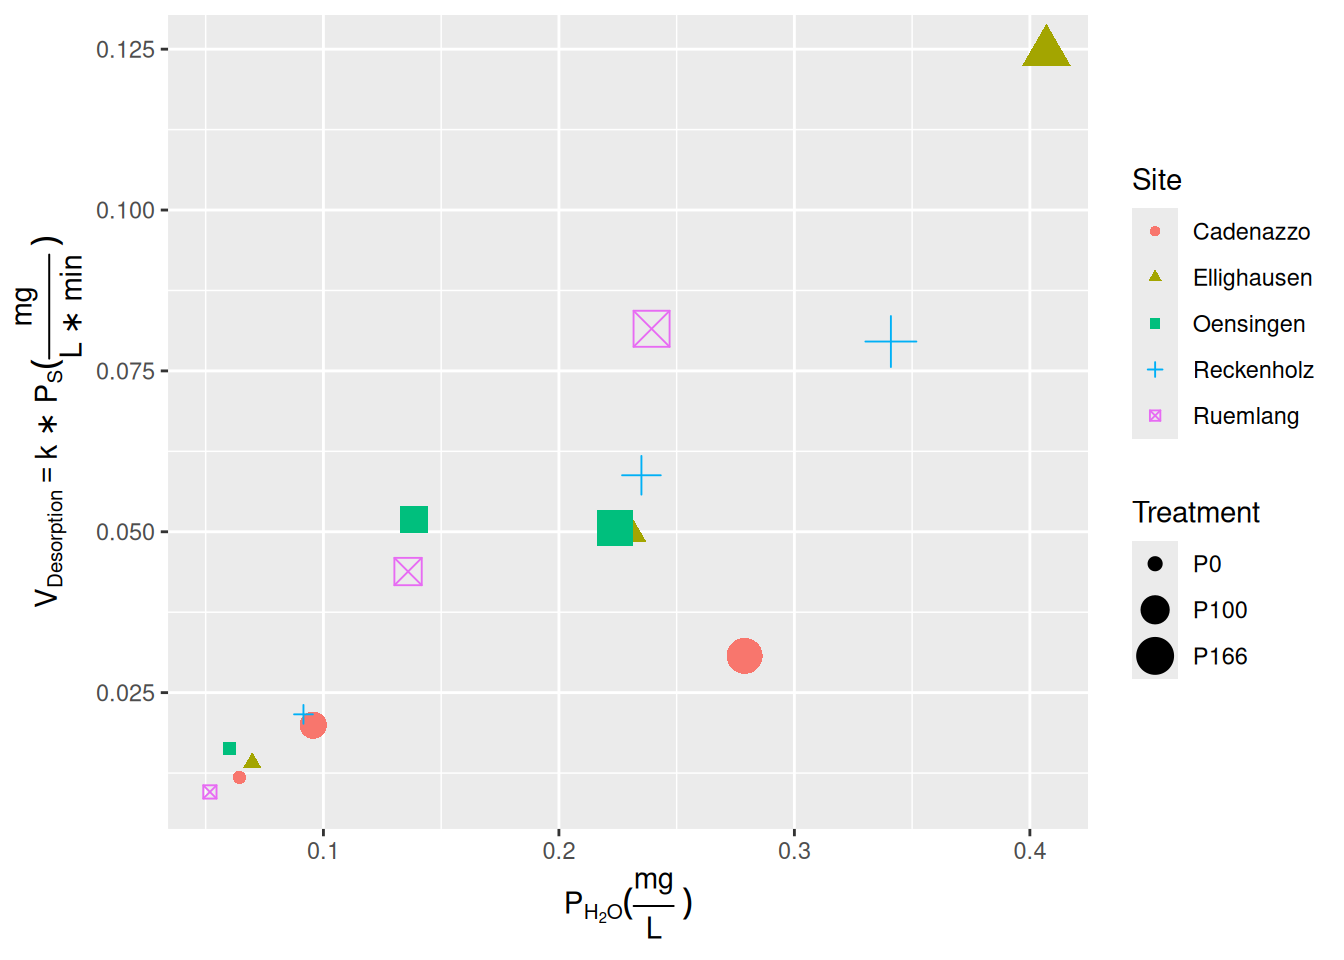

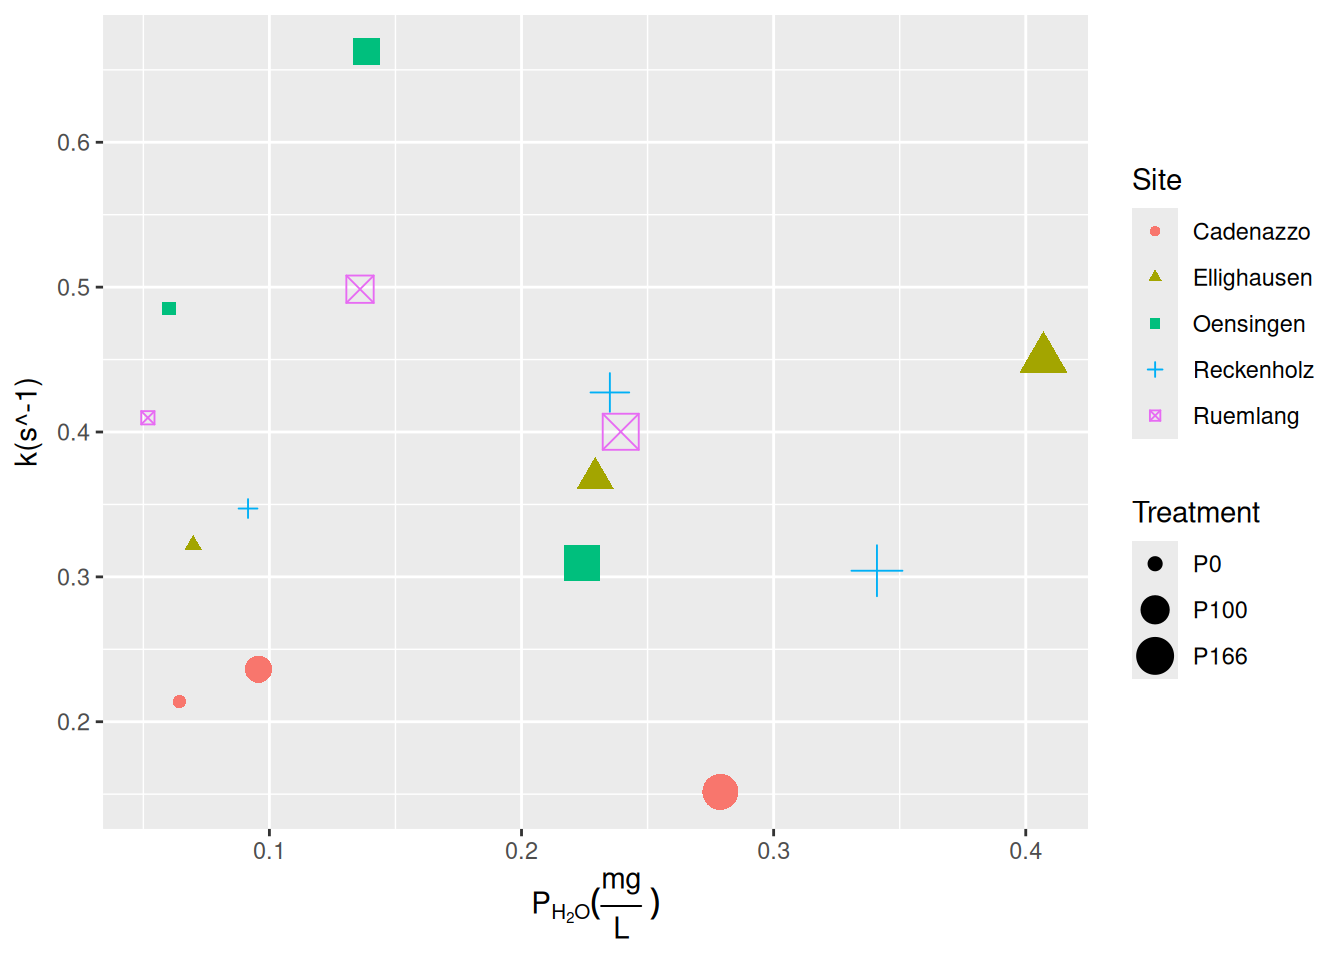

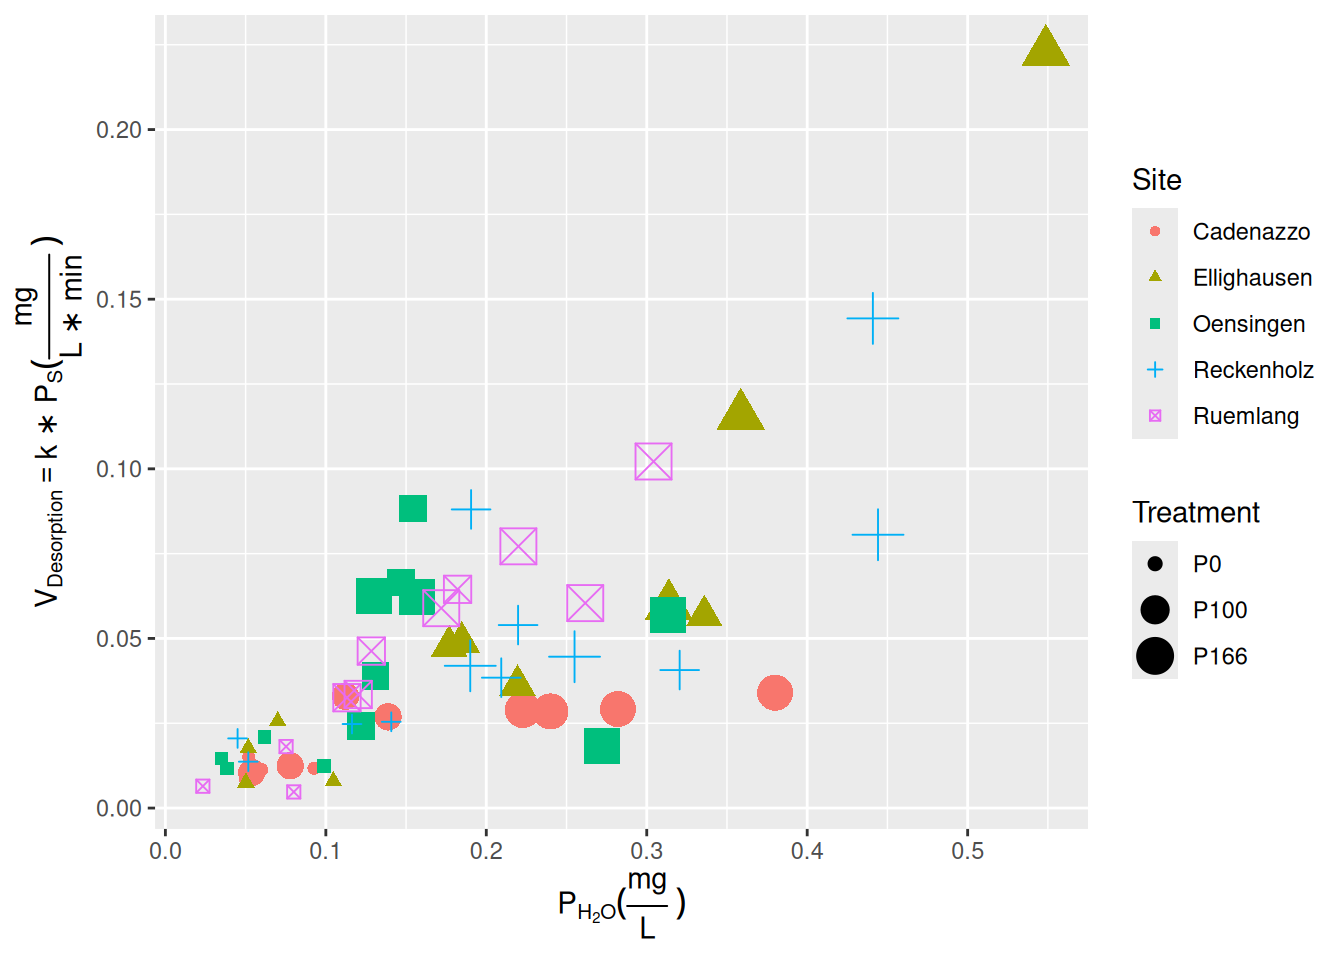

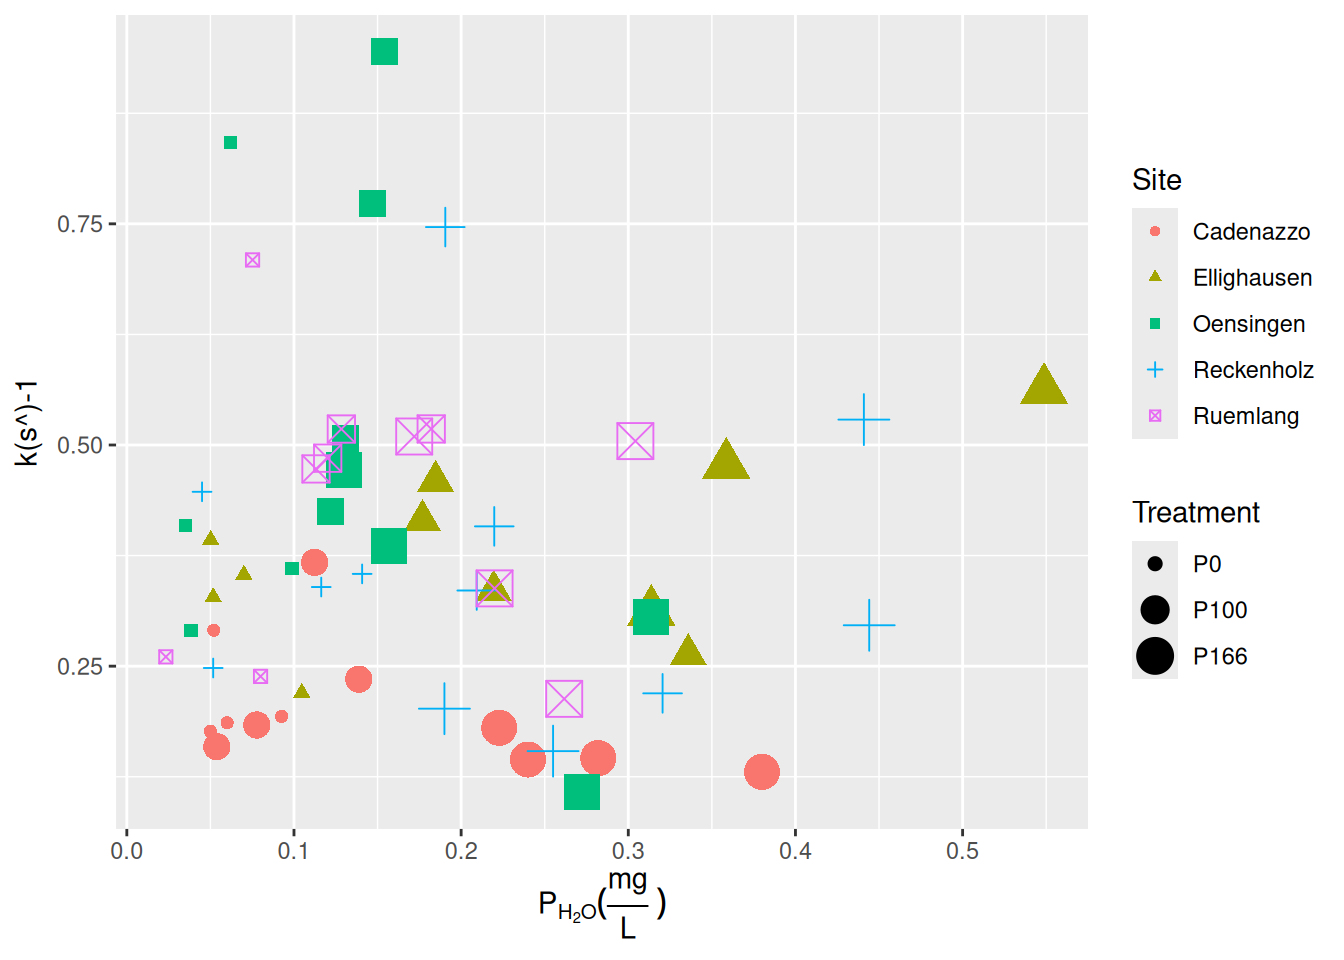

In [ ]:
rr <- coef(Res) 
rr$uid <- rr %>% rownames()
d <- merge(d,rr,by= "uid",by.x = "uid")

d2 <- subset(d,select = c(Site,Treatment,Repetition,Pv_labile.mg.L.,k,PS))


# Create a unique ID combining Site and Treatment
d2 <- d2 %>%
  mutate(ui = paste(Site, Treatment, sep = "_")) %>%
  group_by(ui, Site, Treatment) %>%
  summarise(
    k = mean(k, na.rm = TRUE),
    PS = mean(PS, na.rm = TRUE),
    Plabile = mean(Pv_labile.mg.L., na.rm = TRUE),
    .groups = "drop"
  )

d3 <- subset(d,select = c(Site,Treatment,Repetition,Pv_labile.mg.L.,k,PS,uid))
d3 <- d3 %>%
  mutate(ui = paste(Site, Treatment, sep = "_")) %>%
  group_by(uid, Site, Treatment) %>%
  summarise(
    k = mean(k, na.rm = TRUE),
    PS = mean(PS, na.rm = TRUE),
    Plabile = mean(Pv_labile.mg.L., na.rm = TRUE),
    .groups = "drop"
  )




p2 <- ggplot(d2,aes(y=k*PS, x=Plabile, col = Site)) +
  geom_point(aes(shape=Site, size = Treatment)) +
  labs(x=TeX("$P_{H_2O}(\\frac{mg}{L})$"),
         y=TeX("$V_{Desorption}=k*P_S (\\frac{mg}{L*min})$"))
  #facet_grid(Site ~ Treatment) + 
  
p2
